# Import Libraries


In [1]:
import requests
from bs4 import BeautifulSoup
import os
import urllib.request
import torch
import torch.nn.functional as F
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import permutations


# Define Functions

In [2]:
def extract_champion_stats():
    """
    Args:
      None
    Returns:
      data (list): List of lists(rows) containing base stats for each champion
    """
    url = 'https://leagueoflegends.fandom.com/wiki/List_of_champions/Base_statistics'
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the webpage.")
        return

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')

    if not table:
        print("Table not found.")
        return
    rows = table.find_all('tr')[1:]#Skip image column
    data = []

    for row in rows:
        # Extract the columns (cells) of the row
        cells = row.find_all('td')

        # Only proceed if the row has enough cells (ensuring we are in the right rows)
        if len(cells) >= 19:
            row_data = [cell.text.strip() for cell in cells]
            data.append(row_data)
    return data


def format_data(data):
    """
    Args:
      data (list): List of lists(rows) containing base stats for each champion
    Returns:
      data (list): List of lists(rows) containing base stats for each champion but formatted without the names and values without +,% and trailing spaces,converted to int
      champion_n_list (list): List of the champions name in alphabetical order
    """
    champion_n_list=[]
    for row in data:
      champion_name=row.pop(0)
      champion_n_list.append(champion_name)
      for i in range(len(row)):
            row[i] = float(row[i].replace("+", "").replace("%", ""))
    return data,champion_n_list

def get_class(champion_name):
    """
    Args:
      champion_name (str): Name of the champion
    Returns:
      champion_class (str): Class of the champion
    """
    url = "https://leagueoflegends.fandom.com/wiki/"+champion_name+"/LoL"
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the webpage.")
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        champion_class = soup.css.select_one('div[data-source="role"] [data-game="lol"]').text
    except AttributeError:
        champion_class = "Mage"
    return champion_class




# Scraping and Formatting

Get core stats from table on Wiki and format it

In [3]:
data = extract_champion_stats()
print(data,type(data))

formatted_data,champion_n_list = format_data(data)
print(champion_n_list)

[['Aatrox', '650', '+114', '3', '+0.5', '0', '+0', '0', '+0', '60', '+5', '0.651', '+2.5%', '38', '+4.8', '32', '+2.05', '345', '175'], ['Ahri', '590', '+104', '2.5', '+0.6', '418', '+25', '8', '+0.8', '53', '+3', '0.668', '+2.2%', '21', '+4.7', '30', '+1.3', '330', '550'], ['Akali', '600', '+119', '9', '+0.9', '200', '+0', '50', '+0', '62', '+3.3', '0.625', '+3.2%', '23', '+4.7', '37', '+2.05', '345', '125'], ['Akshan', '630', '+107', '3.75', '+0.65', '350', '+40', '8.2', '+0.7', '52', '+3', '0.638', '+4%', '26', '+4.7', '30', '+1.3', '330', '500'], ['Alistar', '685', '+120', '8.5', '+0.85', '350', '+40', '8.5', '+0.8', '62', '+3.75', '0.625', '+2.125%', '47', '+4.7', '32', '+2.05', '330', '125'], ['Amumu', '685', '+94', '9', '+0.85', '285', '+40', '7.4', '+0.55', '57', '+3.8', '0.736', '+2.18%', '33', '+4', '32', '+2.05', '335', '125'], ['Anivia', '550', '+92', '5.5', '+0.55', '495', '+45', '8', '+0.8', '51', '+3.2', '0.658', '+1.68%', '21', '+4.5', '30', '+1.3', '325', '600'], ['Ann

Get actual classes for champions from Wiki

In [7]:
ac = []
for champion in champion_n_list:
  print(champion)
  champion_class = get_class(champion)
  if champion_class == " Burst" or champion_class == " Battlemage" or champion_class == " Artillery":
      ac.append("Mage")
  elif champion_class == " Enchanter" or champion_class == " Catcher":
      ac.append("Controller")
  elif champion_class == " Juggernaut" or champion_class == " Diver":
      ac.append("Fighter")
  elif champion_class == " Assassin" or champion_class == " Skirmisher":
      ac.append("Slayer")
  elif champion_class == " Vanguard" or champion_class == " Warden":
      ac.append("Tank")
  else:
      ac.append(champion_class.strip())
print(ac)


Aatrox
Ahri
Akali
Akshan
Alistar
Amumu
Anivia
Annie
Aphelios
Ashe
Aurelion Sol
Aurora
Azir
Bard
Bel'Veth
Blitzcrank
Brand
Braum
Briar
Caitlyn
Camille
Cassiopeia
Cho'Gath
Corki
Darius
Diana
Dr. Mundo
Draven
Ekko
Elise
Evelynn
Ezreal
Fiddlesticks
Fiora
Fizz
Galio
Gangplank
Garen
Gnar
Gragas
Graves
Gwen
Hecarim
Heimerdinger
Hwei
Illaoi
Irelia
Ivern
Janna
Jarvan IV
Jax
Jayce
Jhin
Jinx
K'Sante
Kai'Sa
Kalista
Karma
Karthus
Kassadin
Katarina
Kayle
Kayn
Kennen
Kha'Zix
Kindred
Kled
Kled & Skaarl
Kog'Maw
LeBlanc
Lee Sin
Leona
Lillia
Lissandra
Lucian
Lulu
Lux
Malphite
Malzahar
Maokai
Master Yi
Mega Gnar
Milio
Miss Fortune
Mordekaiser
Morgana
Naafiri
Nami
Nasus
Nautilus
Neeko
Nidalee
Nilah
Nocturne
Nunu & Willump
Olaf
Orianna
Ornn
Pantheon
Poppy
Pyke
Qiyana
Quinn
Rakan
Rammus
Rek'Sai
Rell
Renata Glasc
Renekton
Rengar
Riven
Rumble
Ryze
Samira
Sejuani
Senna
Seraphine
Sett
Shaco
Shen
Shyvana
Singed
Sion
Sivir
Skarner
Smolder
Sona
Soraka
Swain
Sylas
Syndra
Tahm Kench
Taliyah
Talon
Taric
Teemo
Thresh
T

In [4]:
tensor_data = torch.tensor(formatted_data)
print(tensor_data,tensor_data.shape)

tensor([[650.0000, 114.0000,   3.0000,  ...,   2.0500, 345.0000, 175.0000],
        [590.0000, 104.0000,   2.5000,  ...,   1.3000, 330.0000, 550.0000],
        [600.0000, 119.0000,   9.0000,  ...,   2.0500, 345.0000, 125.0000],
        ...,
        [574.0000,  96.0000,   5.5000,  ...,   1.3000, 335.0000, 550.0000],
        [630.0000, 106.0000,   7.5000,  ...,   1.3000, 340.0000, 550.0000],
        [574.0000,  93.0000,   5.5000,  ...,   1.3000, 340.0000, 575.0000]]) torch.Size([170, 18])


# Perform clustering

In [8]:

n_centroids = 7
# Initialize centroids randomly
centroids = tensor_data[:n_centroids]


# Define the number of iterations
num_iterations = 1000

for _ in range(num_iterations):
    # Calculate distances from data points to centroids
    distances = torch.cdist(tensor_data, centroids)

    # Assign each data point to the closest centroid
    _, labels = torch.min(distances, dim=1)

    # Update centroids by taking the mean of data points assigned to each centroid
    for i in range(n_centroids):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(tensor_data[labels == i], dim=0)
print(type(labels))



<class 'torch.Tensor'>


# Visualize confusion matrices

## 1. Visualize most optimal confusion matrix


In [9]:
class_names = ['Fighter', 'Slayer', 'Specialist', 'Marksman', 'Mage','Controller','Tank']
all_combinations = list(permutations(class_names))
all_combinations_as_lists = [list(comb) for comb in all_combinations]
print(type(labels))
combination_cc = []
for combination in all_combinations_as_lists:
  cc = []
  for label in labels.numpy():
    cc.append(combination[label])
  combination_cc.append(cc)

best_trace = -1
best_combination = None
best_mapping =None

for comb in combination_cc:
  cm = confusion_matrix(ac, comb, labels=class_names)
  trace = np.trace(cm)
  if trace > best_trace:
      best_trace = trace
      best_combination = comb






<class 'torch.Tensor'>


[[15  9  0  2  0  0  3]
 [11  8  2  0  0  0 10]
 [ 4  1  1  6  2  1  0]
 [ 0  0  0 19  0  6  0]
 [ 0  1  1  2 16 11  2]
 [ 2  0  0  3  2  8  1]
 [10  1  0  0  0  0 10]]


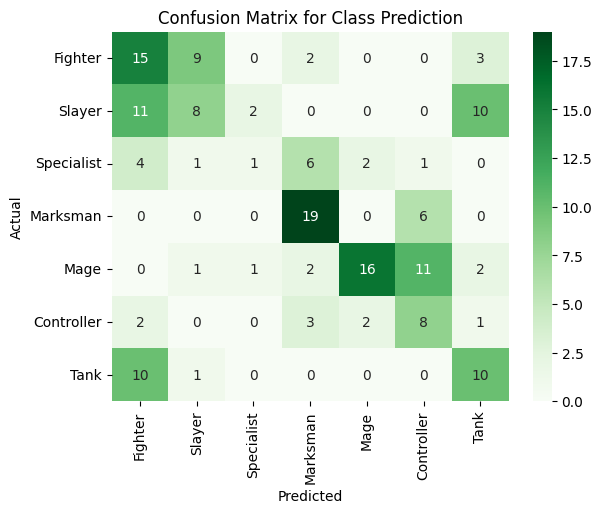

In [15]:
cm = confusion_matrix(ac, best_combination, labels=class_names)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Class Prediction')
plt.show()

In [ ]:
print(best_combination)

#0:Slayer
#1: Controller
#2: Specialist
#3:Marksman
#4:Tank
#5:Fighter
#6:Mage

['Slayer', 'Controller', 'Specialist', 'Marksman', 'Tank', 'Fighter', 'Mage', 'Controller', 'Controller', 'Marksman', 'Mage', 'Mage', 'Marksman', 'Marksman', 'Slayer', 'Fighter', 'Mage', 'Fighter', 'Slayer', 'Controller', 'Fighter', 'Controller', 'Fighter', 'Controller', 'Fighter', 'Tank', 'Slayer', 'Marksman', 'Fighter', 'Marksman', 'Fighter', 'Controller', 'Mage', 'Fighter', 'Fighter', 'Tank', 'Fighter', 'Slayer', 'Specialist', 'Tank', 'Marksman', 'Fighter', 'Fighter', 'Controller', 'Mage', 'Fighter', 'Tank', 'Mage', 'Controller', 'Fighter', 'Fighter', 'Tank', 'Marksman', 'Marksman', 'Fighter', 'Marksman', 'Marksman', 'Controller', 'Mage', 'Tank', 'Slayer', 'Fighter', 'Tank', 'Marksman', 'Fighter', 'Marksman', 'Specialist', 'Slayer', 'Marksman', 'Controller', 'Fighter', 'Fighter', 'Tank', 'Mage', 'Marksman', 'Controller', 'Mage', 'Fighter', 'Controller', 'Tank', 'Fighter', 'Slayer', 'Controller', 'Marksman', 'Slayer', 'Marksman', 'Tank', 'Controller', 'Fighter', 'Tank', 'Mage', 'Mark

# Export data

In [ ]:
i = 0
for row in data:
  row.insert(0,champion_n_list[i])
  row.insert(1,cc[i])
  row.insert(2,ac[i])
  i+=1
print(data)


[['Aatrox', 'Fighter', 'Fighter', 650.0, 114.0, 3.0, 0.5, 0.0, 0.0, 0.0, 0.0, 60.0, 5.0, 0.651, 2.5, 38.0, 4.8, 32.0, 2.05, 345.0, 175.0], ['Ahri', 'Mage', 'Mage', 590.0, 104.0, 2.5, 0.6, 418.0, 25.0, 8.0, 0.8, 53.0, 3.0, 0.668, 2.2, 21.0, 4.7, 30.0, 1.3, 330.0, 550.0], ['Akali', 'Specialist', 'Slayer', 600.0, 119.0, 9.0, 0.9, 200.0, 0.0, 50.0, 0.0, 62.0, 3.3, 0.625, 3.2, 23.0, 4.7, 37.0, 2.05, 345.0, 125.0], ['Akshan', 'Marksman', ' Marksman', 630.0, 107.0, 3.75, 0.65, 350.0, 40.0, 8.2, 0.7, 52.0, 3.0, 0.638, 4.0, 26.0, 4.7, 30.0, 1.3, 330.0, 500.0], ['Alistar', 'Tank', 'Tank', 685.0, 120.0, 8.5, 0.85, 350.0, 40.0, 8.5, 0.8, 62.0, 3.75, 0.625, 2.125, 47.0, 4.7, 32.0, 2.05, 330.0, 125.0], ['Amumu', 'Slayer', 'Tank', 685.0, 94.0, 9.0, 0.85, 285.0, 40.0, 7.4, 0.55, 57.0, 3.8, 0.736, 2.18, 33.0, 4.0, 32.0, 2.05, 335.0, 125.0], ['Anivia', 'Controller', 'Mage', 550.0, 92.0, 5.5, 0.55, 495.0, 45.0, 8.0, 0.8, 51.0, 3.2, 0.658, 1.68, 21.0, 4.5, 30.0, 1.3, 325.0, 600.0], ['Annie', 'Mage', 'Mage

In [ ]:
import csv

with open('champion_analysis.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)